Gán nhãn ảnh

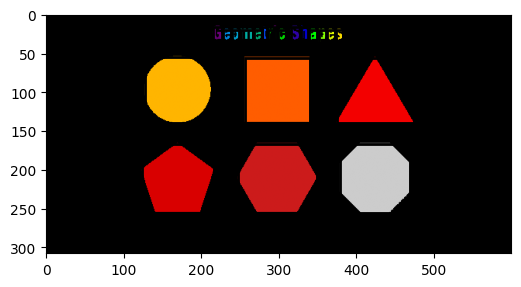

In [1]:
from PIL import Image
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = Image.open('geometric.png') .convert('L')
a = np.array(data)

# performing Otsu's thresholding
thresh = threshold_otsu(a)

#pixel with intensity greater than threshold are kept
b = a > thresh 

# labelling is perfromed on b
c = label(b)
cl = Image.fromarray(c)
iio.imsave('label_output.png', cl)

# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'Boundingbox']
d = regionprops(c)

# the following command creates an emty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='nipy_spectral')

for i in d:
    lr, lc, ur, uc = i ['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr

    # rectangular boxes with origin at (lc, lr) are drawn
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height,
                              fill=False, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
plt.show()
    


Dò tìm cạnh theo chiều dọc

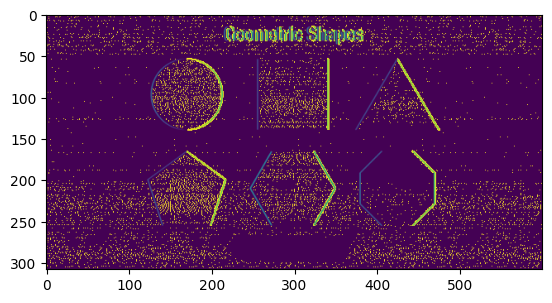

In [8]:
from PIL import Image
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()


Dò tìm cạnh với Sobel Filter

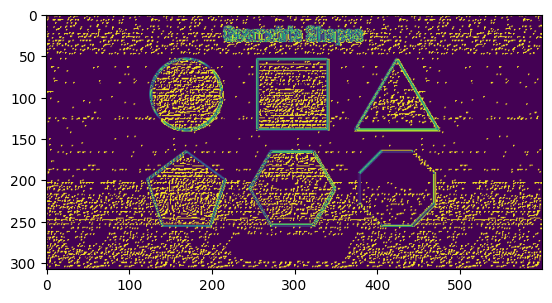

In [2]:
from PIL import Image
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import cv2
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = Image.open('geometric.png').convert('L')
data = np.array(data)
a = nd.sobel(data, axis = 0)
b = nd.sobel(data, axis = 1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()


Xác định góc của đối tượng

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


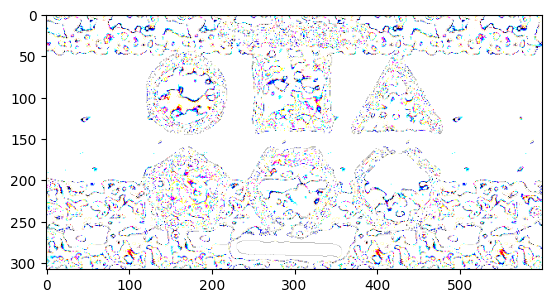

In [14]:
from PIL import Image
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import cv2
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def Harris(indata, alpha = 0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    xl = x ** 2
    yl = y ** 2
    xy = abs (x * y)
    xl = nd.gaussian_filter(xl, 3)
    yl = nd.gaussian_filter(yl, 3)
    xy = nd.gaussian_filter(xy, 3)
    
    detC = xl * yl - 2 * xy
    traceC = xl + yl
    R = detC - alpha * (traceC ** 2)
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg, cmap='gray')
plt.show()

Dò tìm hình dạng cụ thể trong ảnh với Hough Transform

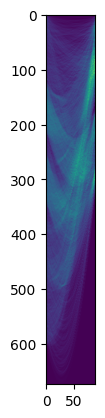

In [ ]:
# Dò tìm đường thẳng trong ảnh
from PIL import Image
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import cv2
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def hough_line(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V**2 + H**2))
    ho = np.zeros((R, 90), float) # Hough space
    w = data.copy().astype(float)
    theta = np.arange(90) / 180 * np.pi
    tp = np.arange(90).astype(float)
    ok = True
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = False
        else:
            v, h = divmod(w.argmax(), H)
            y = V - v   
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v, h] = 0
    return ho

# Use the variable 'a' from previous cells as the image data
bmg = hough_line(a, 0.5)
plt.imshow(bmg)
plt.show()


Dò tìm đường tròn trong ảnh

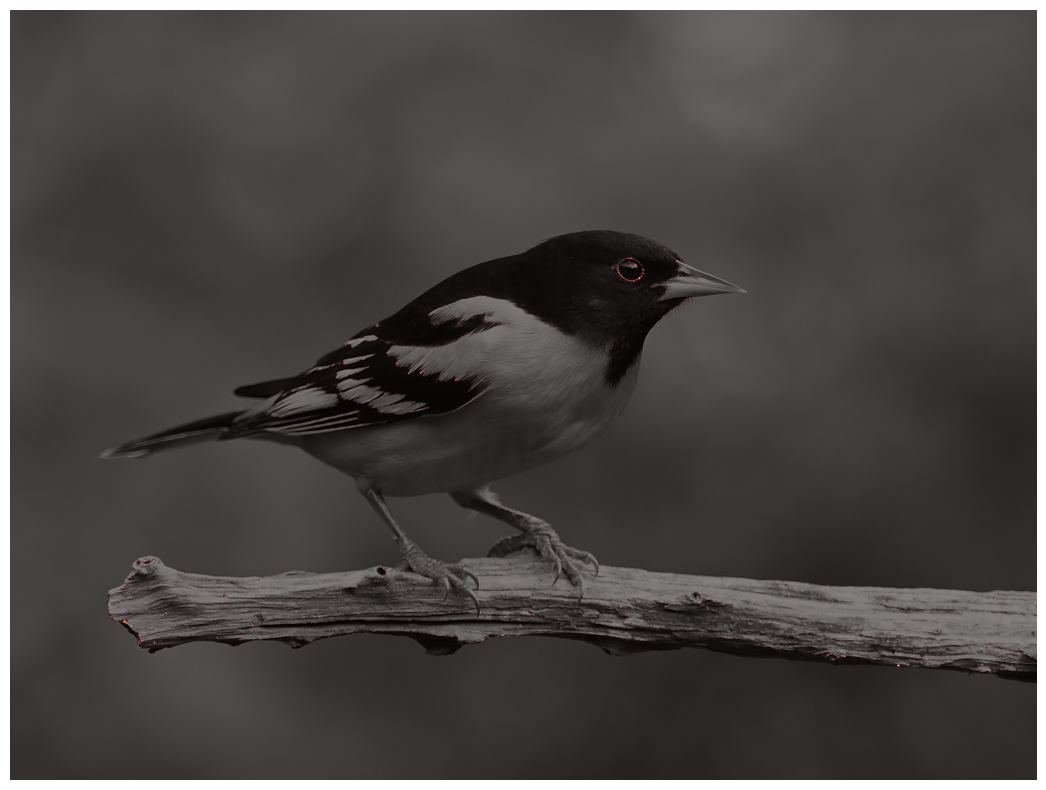

In [19]:
from PIL import Image
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
from skimage.feature import corner_harris
from skimage.color import rgb2gray
import cv2
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = Image.open('bird.png')
graybird = rgb2gray(data)
corners = corner_harris(graybird, k=0.001)

plt.figure(figsize=(20, 10))
plt.imshow(graybird, cmap='gray')
plt.imshow(corners, cmap='hot', alpha=0.5)  # overlay corners
plt.axis('off')
plt.show()